In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2

In [5]:
mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)

In [9]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [10]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [12]:
model.fit(x_train,y_train,epochs=3)

Epoch 1/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1102 - accuracy: 0.9659
Epoch 2/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0748 - accuracy: 0.9764
Epoch 3/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0561 - accuracy: 0.9817


In [13]:
model.save('handwritten.model')

INFO:tensorflow:Assets written to: handwritten.model\assets


In [14]:
model=tf.keras.models.load_model('handwritten.model')

In [16]:
loss,accuracy=model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1098 - accuracy: 0.9673


In [19]:
print(loss*100)

10.97738891839981


In [20]:
print(accuracy*100)

96.72999978065491


In [21]:
import os

In [22]:
os.getcwd()

'C:\\Users\\Vinay'

In [23]:
os.chdir('C:\\Users\\Vinay\\Downloads')

In [91]:
img=cv2.imread('hw5.png')[:,:,0]
img=np.invert(np.array([img]))

In [92]:
prediction=model.predict(img)

1/1 [==============================] - 0s 47ms/step


In [93]:
prediction

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [94]:
np.argmax(prediction)

5

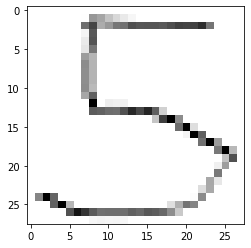

In [95]:
plt.imshow(img[0],cmap=plt.cm.binary)

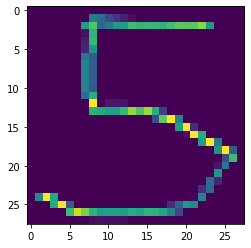

In [96]:
plt.imshow(img[0])

In [97]:
mnist

<module 'keras.api._v2.keras.datasets.mnist' from 'C:\\Users\\Vinay\\AppData\\Roaming\\Python\\Python39\\site-packages\\keras\\api\\_v2\\keras\\datasets\\mnist\\__init__.py'>